## Project (E) 448
## Linear Regression - Parameter Distribution
### Daniël S. van der Westhuizen
### 17158680

In [1]:
import numpy as np
import pylab as pl
from functions import *

## Bayesian Linear Regression

from Mackay's book

### Parameter Distribution

Here we define an 2D array over weight space, starting with the distribution shown in the figure below.

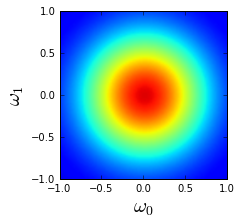

In [7]:
%matplotlib inline
pl.figure(figsize=(7,3))

#mathematics
data = np.random.rand(100,100)
for a in range(0,100):
    for b in range(0,100):
        x_loc = -1 + (b*0.02)
        y_loc = -1 + (a*0.02)
        probability = np.exp( -(( np.sqrt((x_loc)**2 + (y_loc)**2) )**2) / (2*(0.5**2)) )
        data[a][b] = probability

#figure
pl.gca().invert_yaxis()
pl.imshow(data, extent=[-1,1,-1,1],vmin=-0.1,vmax=1.1)
pl.ylabel('$\omega_1$', fontsize=20)
pl.xlabel('$\omega_0$', fontsize=20)

In order to select random samples from a 2D probabilty distribution like this one, I wrote the heatmap_random function in the functions.py file.

Below is an evalution of $ y = \omega_0 + \omega_1 x $ for 6 random samples.

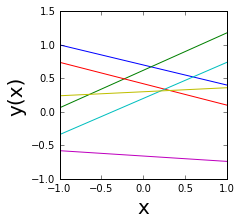

In [14]:
%matplotlib inline
pl.figure(figsize=(3,3))

#mathematics
w0, w1 = heatmap_random(data,6)

x_samples = []
y_samples = []

#figure
x_axis = np.linspace (-1,1,100)
for a in range(0,6):
    pl.plot(x_axis, w0[a] + w1[a]*x_axis)
pl.xlim(-1,1)
pl.xlim(-1,1)
pl.ylabel('y(x)', fontsize=20)
pl.xlabel('x', fontsize=20)

A point on the x axis gets uniformly selected on the interval [-1,1]. Then for each of those points the equation $ y = -0.3 + 0.5x + Normal(0,0.2)$ gets evaluated.

This technique will recover the values -0.3 and 0.5.

In [15]:
a0 = -0.3
a1 = 0.5
beta = 25
alpha = 2

s = 0.2

x_sample = np.random.uniform(-1,1)
x_samples.append(x_sample)
y_sample = a0 + (a1*x_sample) + np.random.normal(0,0.2)
y_samples.append(y_sample)

Using these particular random x and y values that were defined in the block above, we determine and plot the probability of y = -w0 + w1*x over w space. We then multiply this with the previous probability distribution over w space. We then again generate samples from the weight space using the heatmap_random function. 

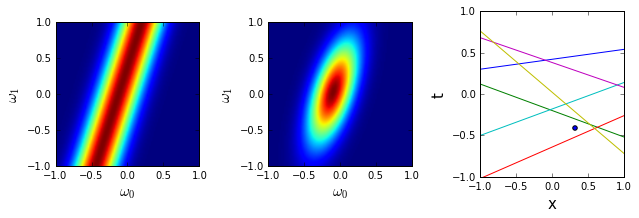

In [16]:
%matplotlib inline
pl.figure(figsize=(9,3))

current_sample_prob = np.random.rand(100,100)

for a in range(0,100):
    for b in range(0,100):
        w0 = -1 + (b*0.02)
        w1 = -1 + (a*0.02)
        y = w0 + (w1*x_sample)
        y_actual = a0 + (a1*x_sample)
        probability = np.exp(-(( (y-y_actual) -0)**2)/(2*(s**2)))
        current_sample_prob[a][b] = probability
        
data = data*current_sample_prob

w0, w1 = heatmap_random(data, 6)

pl.subplot(1, 3, 1)
pl.gca().invert_yaxis()
pl.imshow(current_sample_prob, extent=[-1,1,-1,1])
pl.ylabel('$\omega_1$', fontsize=15)
pl.xlabel('$\omega_0$', fontsize=15)

pl.subplot(1, 3, 2)
pl.gca().invert_yaxis()
pl.imshow(data, extent=[-1,1,-1,1])
pl.ylabel('$\omega_1$', fontsize=15)
pl.xlabel('$\omega_0$', fontsize=15)

pl.subplot(1, 3, 3)
x_axis = np.linspace (-1,1,100)
for a in range(0,6):
    pl.plot(x_axis, w0[a] + w1[a]*x_axis)
pl.xlim(-1,1)
pl.ylim(-1,1)
pl.scatter(x_samples,y_samples)
pl.tight_layout()
pl.ylabel('t', fontsize=15)
pl.xlabel('x', fontsize=15)

This process can the be repeated a many times as desired.Below are the results after 20 iterations.

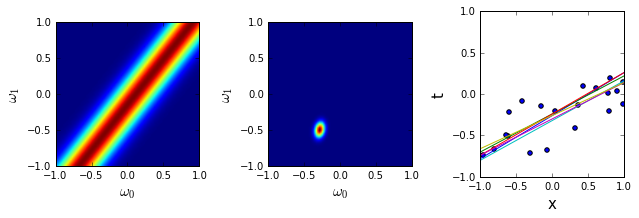

In [17]:
%matplotlib inline
pl.figure(figsize=(9,3))

for k in range(0,20-1):
    
    x_sample = np.random.uniform(-1,1)
    x_samples.append(x_sample)
    y_sample = a0 + (a1*x_sample) + np.random.normal(0,0.2)
    y_samples.append(y_sample)

    current_sample_prob = np.random.rand(100,100)

    for a in range(0,100):
        for b in range(0,100):
            w0 = -1 + (b*0.02)
            w1 = -1 + (a*0.02)
            y = w0 + (w1*x_sample)
            y_actual = a0 + (a1*x_sample)
            probability = np.exp(-(( (y-y_actual) -0)**2)/(2*(s**2)))
            current_sample_prob[a][b] = probability

    data = data*current_sample_prob
    
    
w0, w1 = heatmap_random(data, 6)

pl.subplot(1, 3, 1)
pl.gca().invert_yaxis()
pl.imshow(current_sample_prob, extent=[-1,1,-1,1])
pl.ylabel('$\omega_1$', fontsize=15)
pl.xlabel('$\omega_0$', fontsize=15)

pl.subplot(1, 3, 2)
pl.gca().invert_yaxis()
pl.imshow(data, extent=[-1,1,-1,1])
pl.ylabel('$\omega_1$', fontsize=15)
pl.xlabel('$\omega_0$', fontsize=15)

pl.subplot(1, 3, 3)
x_axis = np.linspace (-1,1,100)
for a in range(0,6):
    pl.plot(x_axis, w0[a] + w1[a]*x_axis)
pl.xlim(-1,1)
pl.ylim(-1,1)
pl.scatter(x_samples,y_samples)
pl.tight_layout()
pl.ylabel('t', fontsize=15)
pl.xlabel('x', fontsize=15)

This particular illustration is for the case of a one-dimensional input space and a single basis function $ \phi (x) = x $. This method is not limited to these constraints, but a higher dimensional input space will require an exponentionally larger amount of computer calculations.